In [94]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import os

In [95]:
data_mac = pd.read_csv('RPI_inferences_loop_5.csv')

In [96]:
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = data_mac.columns[ind]
data_mac.rename(columns=dict(zip(old_names, names)),inplace=True)

In [97]:
y = [i for i in range(0,10,1)]
data_mac.loc['mean'] = data_mac.mean()

In [98]:
data_mac

,cnn_converted,cnn_quant,cnn_quant16,cnn_quant8,ffnn_converted,ffnn_quant,ffnn_quant16,ffnn_quant8,cnn,ffnn_mod
0,4.620,4.630,4.610,3.230,8.660,5.450,8.870,13.36,3.800,7.500
1,4.640,4.620,4.610,3.240,8.660,5.440,8.860,13.38,3.250,6.830
2,4.610,4.620,4.620,3.240,8.680,5.440,8.880,13.39,3.300,6.800
3,4.620,4.620,4.610,3.240,8.660,5.460,8.980,13.39,3.270,6.850
4,4.620,4.620,4.620,3.230,8.680,5.440,8.970,13.38,3.270,6.790
mean,4.622,4.622,4.614,3.236,8.668,5.446,8.912,13.38,3.378,6.954


In [99]:
columns = list(data_mac.columns)
means = list(data_mac.iloc[5])

<BarContainer object of 10 artists>

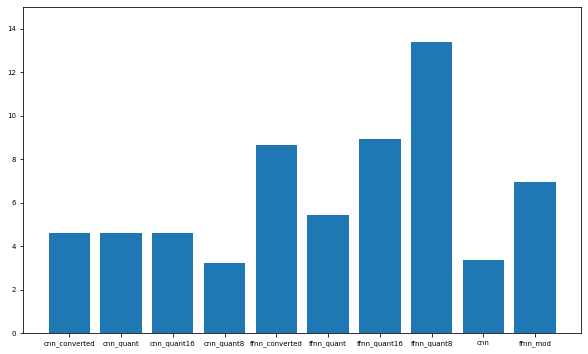

In [100]:
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
colors = plt.cm.Greens(means)
plt.ylim([0,15])
plt.bar(columns, means)

In [101]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import numpy as np

data_rpi = pd.read_csv('RPI_inferences_loop_10.csv')
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = data_rpi.columns[ind]
data_rpi.rename(columns=dict(zip(old_names, names)),inplace=True)
y = [i for i in range(0,10,1)]
data_rpi.loc['mean'] = data_rpi.mean()

In [102]:
data_rpi

,cnn_converted,cnn_quant,cnn_quant16,cnn_quant8,ffnn_converted,ffnn_quant,ffnn_quant16,ffnn_quant8,cnn,ffnn
0,4.620,4.61,4.660,3.230,8.980,5.510,9.17,13.380,3.790,7.350
1,4.620,4.61,4.600,3.240,9.010,5.480,9.18,13.410,3.260,6.900
2,4.610,4.61,4.610,3.230,9.000,5.600,9.28,13.420,3.260,6.860
3,4.610,4.61,4.600,3.250,8.970,5.490,9.16,13.450,3.280,6.900
4,4.620,4.61,4.590,3.240,9.000,5.500,9.21,13.410,3.250,6.880
5,4.610,4.61,4.600,3.330,9.080,5.480,9.06,13.410,3.230,6.820
6,4.620,4.61,4.610,3.250,9.010,5.500,9.05,13.410,3.350,6.910
7,4.730,4.61,4.600,3.230,8.990,5.490,9.02,13.430,3.200,6.890
8,4.600,4.61,4.600,3.230,9.010,5.490,9.08,13.440,3.230,6.600
9,4.610,4.61,4.600,3.230,8.980,5.480,8.99,13.410,3.130,6.520


<BarContainer object of 10 artists>

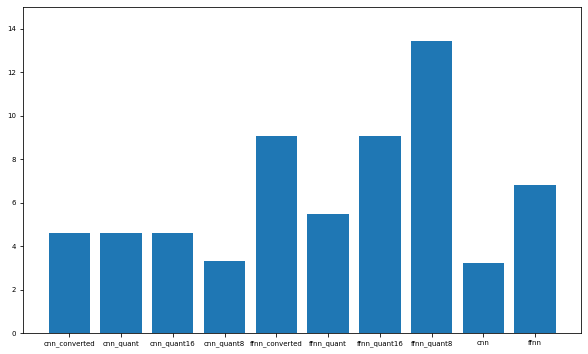

In [103]:
columns = list(data_rpi.columns)
means = list(data_rpi.iloc[5])
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
#colors = plt.cm.Greens(np.linspace(0, 0.5, len(means)))
plt.ylim([0,15])
plt.bar(columns, means)

In [104]:
data_mac = pd.read_csv('RPI_inferences_loop_5.csv')

In [105]:
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = data_mac.columns[ind]
data_mac.rename(columns=dict(zip(old_names, names)),inplace=True)

In [106]:
y = [i for i in range(0,10,1)]
data_mac.loc['mean'] = data_mac.mean()

In [107]:
data_mac

,cnn_converted,cnn_quant,cnn_quant16,cnn_quant8,ffnn_converted,ffnn_quant,ffnn_quant16,ffnn_quant8,cnn,ffnn_mod
0,4.620,4.630,4.610,3.230,8.660,5.450,8.870,13.36,3.800,7.500
1,4.640,4.620,4.610,3.240,8.660,5.440,8.860,13.38,3.250,6.830
2,4.610,4.620,4.620,3.240,8.680,5.440,8.880,13.39,3.300,6.800
3,4.620,4.620,4.610,3.240,8.660,5.460,8.980,13.39,3.270,6.850
4,4.620,4.620,4.620,3.230,8.680,5.440,8.970,13.38,3.270,6.790
mean,4.622,4.622,4.614,3.236,8.668,5.446,8.912,13.38,3.378,6.954


In [108]:
columns = list(data_mac.columns)
means = list(data_mac.iloc[5])

<BarContainer object of 10 artists>

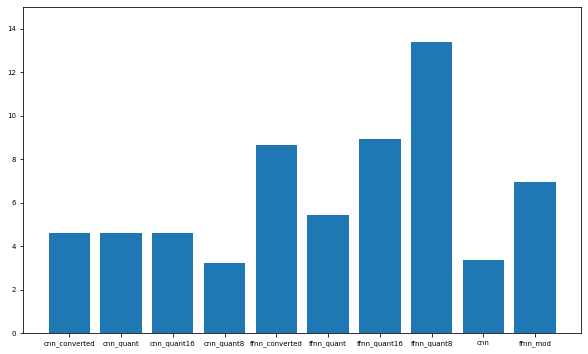

In [109]:
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
colors = plt.cm.Greens(means)
plt.ylim([0,15])
plt.bar(columns, means)

In [110]:
def disk_usage(dir):
    sizes_kb = {}
    print('Models sizes : ')
    for _,_,filenames in os.walk(dir):
        #print(filenames)
        for file in sorted(filenames):
            print(file, ':', os.stat(os.path.join(dir,file)).st_size/1000, 'kb')
            sizes_kb[file] = os.stat(os.path.join(dir,file)).st_size/1000
    return sizes_kb

In [111]:
model_dir = './mnist_models/'
lite_dir = './mnist_tflite_models/'

models_size = disk_usage(model_dir)
litemodels_size = disk_usage(lite_dir)

Models sizes : 
CNN_classic.h5 : 271.416 kb
FFNN_classic.h5 : 3790.408 kb
Models sizes : 
CNN_mnist_model.tflite : 84.356 kb
CNN_mnist_model_quant.tflite : 23.76 kb
CNN_mnist_model_quant16.tflite : 44.256 kb
CNN_mnist_model_quant8.tflite : 24.136 kb
FFNN_mnist_model.tflite : 1259.028 kb
FFNN_mnist_model_quant.tflite : 318.576 kb
FFNN_mnist_model_quant16.tflite : 632.48 kb
FFNN_mnist_model_quant8.tflite : 318.744 kb


In [112]:
list_sizes_cls = list(models_size.values())
list_sizes_tfl = list(litemodels_size.values())

In [113]:
list_sizes = list_sizes_tfl + list_sizes_cls
len(list_sizes_tfl + list_sizes_cls) == len(means)

True

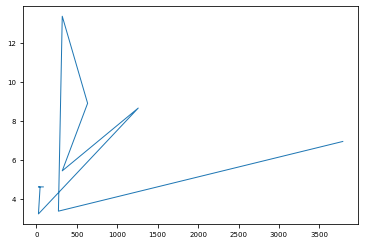

In [114]:
plt.plot(list_sizes, means)

In [116]:
import pickle
with open('./disk_maco.pkl', 'rb') as f:
    rpi_disk_usage = pickle.load(f)

In [119]:
rpi_disk_usage == list_sizes

False

In [118]:
list_sizes

[84.356,
 23.76,
 44.256,
 24.136,
 1259.028,
 318.576,
 632.48,
 318.744,
 271.416,
 3790.408]

In [120]:
rpi_disk_usage

[84.356, 23.76, 44.256, 24.136, 1259.028, 318.576, 632.48, 318.744]